In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
import bfunc

In [3]:
reg = 'Car'
line = 'CarR'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

50.18670390511795

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
box_size = np.sqrt((data.X.max()-data.X.min())*(data.Y.max()-data.Y.min()))*VF['pc']*3600

In [8]:
table = sosflog(data,0.1,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      216.0     8.789839   2.766045     0.211978     7.261944     9.404184   
1      129.0    14.358618   1.032010    12.625015    13.443648    14.541719   
2      188.0    17.916744   1.238812    15.874459    16.826052    18.058414   
3      357.0    22.588400   1.449343    20.012301    21.303552    22.389750   
4      671.0    28.565277   1.918058    25.128815    26.963010    28.622325   
5      866.0    35.799543   2.287079    31.637532    33.730470    35.809906   
6     1424.0    45.103886   3.056635    39.813962    42.396961    45.181927   
7     2233.0    56.868198   3.670492    50.130007    53.680411    56.790830   
8     3397.0    71.630906   4.568948    63.098171    67.758765    71.631621   
9     5069.0    90.151294   5.953690    79.439088    84.959066    90.339869   
10    7696.0   113.364220   7.533578   100.009860   106.946578   113.363703   
11   11862.0   142.741224   9.428972   125.907119   134.770472   143.043425   
12   17437.0   179.483733  11.863601   158.501435   169.243363   179.749110   
13   23927.0   225.913225  15.018659   199.533407   212.995976   226.135607   
14   35445.0   284.335212  18.788759   251.191013   268.135726   284.662742   
15   46353.0   357.480257  23.551505   316.230338   337.293977   357.486222   
16   56442.0   448.738699  29.576952   398.107604   423.209244   448.394120   
17   58612.0   563.585226  37.263920   501.188275   531.199234   562.266302   
18   52745.0   706.482389  46.849887   630.964145   665.539208   703.411807   
19   30403.0   877.114050  56.641181   794.335568   828.104341   868.187173   
20    8294.0  1091.856661  69.547706  1000.018542  1032.324886  1076.257431   
21    1047.0  1333.262624  62.714514  1258.934675  1283.825398  1317.194410   
22       9.0  1644.725897  41.476523  1588.467518  1602.436084  1652.707750   

                                   dV2                                  \
             75%          max    count        mean         std     min   
ils                                                                      
0      11.207008    12.587918    216.0   31.627090  143.357116  0.0001   
1      15.126312    15.845764    129.0   22.570565   90.151394  0.0001   
2      18.906149    19.928318    188.0   31.849316  149.207306  0.0001   
3      23.827790    25.091664    357.0   40.139481  122.572773  0.0000   
4      30.269168    31.621084    671.0   30.415355  117.771740  0.0001   
5      37.792754    39.802429    866.0   45.139577  139.972650  0.0000   
6      47.723883    50.113118   1424.0   50.133580  144.433408  0.0000   
7      60.012278    63.087057   2233.0   49.181006  125.432319  0.0000   
8      75.665763    79.426667   3397.0   64.597310  159.529520  0.0000   
9      95.399891    99.997282   5069.0   67.824525  161.340156  0.0000   
10    119.988853   125.881895   7696.0   72.920195  150.126651  0.0000   
11    150.932136   158.486965  11862.0   82.763940  162.216403  0.0000   
12    189.859589   199.525805  17437.0   88.603162  153.086089  0.0000   
13    238.952772   251.183547  23927.0   93.346518  148.172579  0.0000   
14    300.635662   316.227157  35445.0  107.648128  162.832593  0.0000   
15    377.972493   398.103869  46353.0  116.838837  161.292638  0.0000   
16    473.771922   501.187021  56442.0  112.973156  152.891929  0.0000   
17    595.400470   630.956505  58612.0   96.207120  140.921544  0.0000   
18    746.145160   794.310502  52745.0   88.027391  126.796115  0.0000   
19    921.293163   999.996825  30403.0  119.893527  134.667201  0.0000   
20   1142.876157  1258.914987   8294.0  105.273074  122.228117  0.0000   
21   1363.010839  1582.435391   1047.0   68.002843   93.926659  0.0000   
22   1674.020151  1693.387954      9.0   60.996867  121.342816  0.1089   

                               

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*VF['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*VF['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s)
r0

0.5944415430456239

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.6845374024042847

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

8.519203044360136

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
rgrid = np.linspace(s[0], s[:-1])

(50.18670390511795, 0.5944415430456239, 0.9, 0.009293878266869804, 2.0)

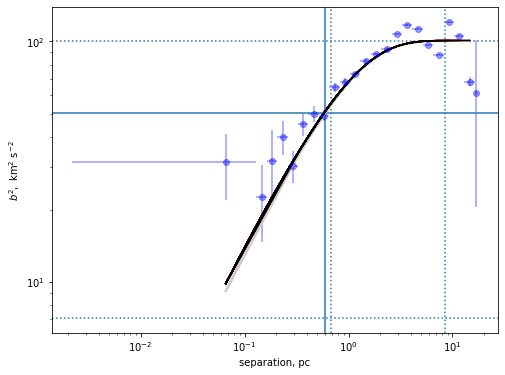

In [16]:
m = 0.9
noise = 2.0
s0 = VF['s0']

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc.bfunc00s(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc.bfunc03s(rgrid, r0, sig2, m, s0, noise), color="red")
ax.plot(rgrid, bfunc.bfunc04s(rgrid, r0, sig2, m, s0, noise, box_size), color="black")

ax.set(xscale='log', yscale='log', 
       xlabel='separation, pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m, s0, noise

In [17]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      216.0     8.789839   2.766045     0.211978     7.261944     9.404184   
1      129.0    14.358618   1.032010    12.625015    13.443648    14.541719   
2      188.0    17.916744   1.238812    15.874459    16.826052    18.058414   
3      357.0    22.588400   1.449343    20.012301    21.303552    22.389750   
4      671.0    28.565277   1.918058    25.128815    26.963010    28.622325   
5      866.0    35.799543   2.287079    31.637532    33.730470    35.809906   
6     1424.0    45.103886   3.056635    39.813962    42.396961    45.181927   
7     2233.0    56.868198   3.670492    50.130007    53.680411    56.790830   
8     3397.0    71.630906   4.568948    63.098171    67.758765    71.631621   
9     5069.0    90.151294   5.953690    79.439088    84.959066    90.339869   
10    7696.0   113.364220   7.533578   100.009860   106.946578   113.363703   
11   11862.0   142.741224   9.428972   125.907119   134.770472   143.043425   
12   17437.0   179.483733  11.863601   158.501435   169.243363   179.749110   
13   23927.0   225.913225  15.018659   199.533407   212.995976   226.135607   
14   35445.0   284.335212  18.788759   251.191013   268.135726   284.662742   
15   46353.0   357.480257  23.551505   316.230338   337.293977   357.486222   
16   56442.0   448.738699  29.576952   398.107604   423.209244   448.394120   
17   58612.0   563.585226  37.263920   501.188275   531.199234   562.266302   
18   52745.0   706.482389  46.849887   630.964145   665.539208   703.411807   
19   30403.0   877.114050  56.641181   794.335568   828.104341   868.187173   
20    8294.0  1091.856661  69.547706  1000.018542  1032.324886  1076.257431   
21    1047.0  1333.262624  62.714514  1258.934675  1283.825398  1317.194410   
22       9.0  1644.725897  41.476523  1588.467518  1602.436084  1652.707750   

                                   dV2                                  \
             75%          max    count        mean         std     min   
ils                                                                      
0      11.207008    12.587918    216.0   31.627090  143.357116  0.0001   
1      15.126312    15.845764    129.0   22.570565   90.151394  0.0001   
2      18.906149    19.928318    188.0   31.849316  149.207306  0.0001   
3      23.827790    25.091664    357.0   40.139481  122.572773  0.0000   
4      30.269168    31.621084    671.0   30.415355  117.771740  0.0001   
5      37.792754    39.802429    866.0   45.139577  139.972650  0.0000   
6      47.723883    50.113118   1424.0   50.133580  144.433408  0.0000   
7      60.012278    63.087057   2233.0   49.181006  125.432319  0.0000   
8      75.665763    79.426667   3397.0   64.597310  159.529520  0.0000   
9      95.399891    99.997282   5069.0   67.824525  161.340156  0.0000   
10    119.988853   125.881895   7696.0   72.920195  150.126651  0.0000   
11    150.932136   158.486965  11862.0   82.763940  162.216403  0.0000   
12    189.859589   199.525805  17437.0   88.603162  153.086089  0.0000   
13    238.952772   251.183547  23927.0   93.346518  148.172579  0.0000   
14    300.635662   316.227157  35445.0  107.648128  162.832593  0.0000   
15    377.972493   398.103869  46353.0  116.838837  161.292638  0.0000   
16    473.771922   501.187021  56442.0  112.973156  152.891929  0.0000   
17    595.400470   630.956505  58612.0   96.207120  140.921544  0.0000   
18    746.145160   794.310502  52745.0   88.027391  126.796115  0.0000   
19    921.293163   999.996825  30403.0  119.893527  134.667201  0.0000   
20   1142.876157  1258.914987   8294.0  105.273074  122.228117  0.0000   
21   1363.010839  1582.435391   1047.0   68.002843   93.926659  0.0000   
22   1674.020151  1693.387954      9.0   60.996867  121.342816  0.1089   

                               

In [18]:
Car = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m,
        'box_size': box_size}

In [19]:
f = open('Results\\SF'+ line + '.pkl',"wb")
pickle.dump(Car,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [20]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 6.709161043167114 seconds ---
